In [11]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import tree
import graphviz 
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import warnings

In [13]:
# encoded data
df = pd.read_csv("Fully_Encoded.csv", header=0)
df.head(10)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,10919.0,26.0,2006.0,10.0,361.0,41.36,28.96,3.77,8.45,82.53,76.000000,51.000000,77.000000,322.000000,1008.000000,1.000000
1,9265.0,11.0,1985.0,4.0,361.0,29.08,3.58,6.81,0.77,40.24,68.997119,26.440992,74.727254,163.008846,835.050081,3.558616
2,5534.0,26.0,2008.0,6.0,361.0,15.68,12.76,3.79,3.29,35.52,82.000000,73.000000,80.000000,709.000000,1008.000000,1.000000
3,10921.0,26.0,2009.0,10.0,361.0,15.61,10.93,3.28,2.95,32.77,80.000000,73.000000,77.000000,192.000000,1008.000000,1.000000
4,7294.0,5.0,1996.0,7.0,361.0,11.27,8.89,10.22,1.00,31.37,68.997119,26.440992,74.727254,163.008846,835.050081,3.558616
5,9646.0,5.0,1989.0,5.0,361.0,23.20,2.26,4.22,0.58,30.26,68.997119,26.440992,74.727254,163.008846,835.050081,3.558616
6,6677.0,4.0,2006.0,4.0,361.0,11.28,9.14,6.50,2.88,29.80,89.000000,65.000000,82.000000,431.000000,1008.000000,1.000000
7,10917.0,26.0,2006.0,3.0,361.0,13.96,9.18,2.93,2.84,28.92,58.000000,41.000000,63.000000,129.000000,1008.000000,1.000000
8,6680.0,26.0,2009.0,4.0,361.0,14.44,6.94,4.70,2.24,28.32,87.000000,80.000000,81.000000,594.000000,1008.000000,1.000000
9,2566.0,11.0,1984.0,8.0,361.0,26.93,0.63,0.28,0.47,28.31,68.997119,26.440992,74.727254,163.008846,835.050081,3.558616


In [14]:
# split into feature columns and sales columns (y vars.)
sales = [name for name in list(df.columns) if 'Sales' in name]
feats = [name for name in list(df.columns) if name not in sales]

y_cols = df[sales]
x_cols = df[feats]

x_cols


,Name,Platform,Year_of_Release,Genre,Publisher,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,10919.0,26.0,2006.0,10.0,361.0,76.000000,51.000000,77.000000,322.000000,1008.000000,1.000000
1,9265.0,11.0,1985.0,4.0,361.0,68.997119,26.440992,74.727254,163.008846,835.050081,3.558616
2,5534.0,26.0,2008.0,6.0,361.0,82.000000,73.000000,80.000000,709.000000,1008.000000,1.000000
3,10921.0,26.0,2009.0,10.0,361.0,80.000000,73.000000,77.000000,192.000000,1008.000000,1.000000
4,7294.0,5.0,1996.0,7.0,361.0,68.997119,26.440992,74.727254,163.008846,835.050081,3.558616
...,...,...,...,...,...,...,...,...,...,...,...
16411,8236.0,17.0,2016.0,0.0,502.0,68.997119,26.440992,74.727254,163.008846,835.050081,3.558616
16412,5084.0,28.0,2006.0,10.0,91.0,68.997119,26.440992,74.727254,163.008846,835.050081,3.558616
16413,3828.0,20.0,2016.0,1.0,233.0,68.997119,26.440992,74.727254,163.008846,835.050081,3.558616
16414,8913.0,6.0,2003.0,4.0,547.0,68.997119,26.440992,74.727254,163.008846,835.050081,3.558616


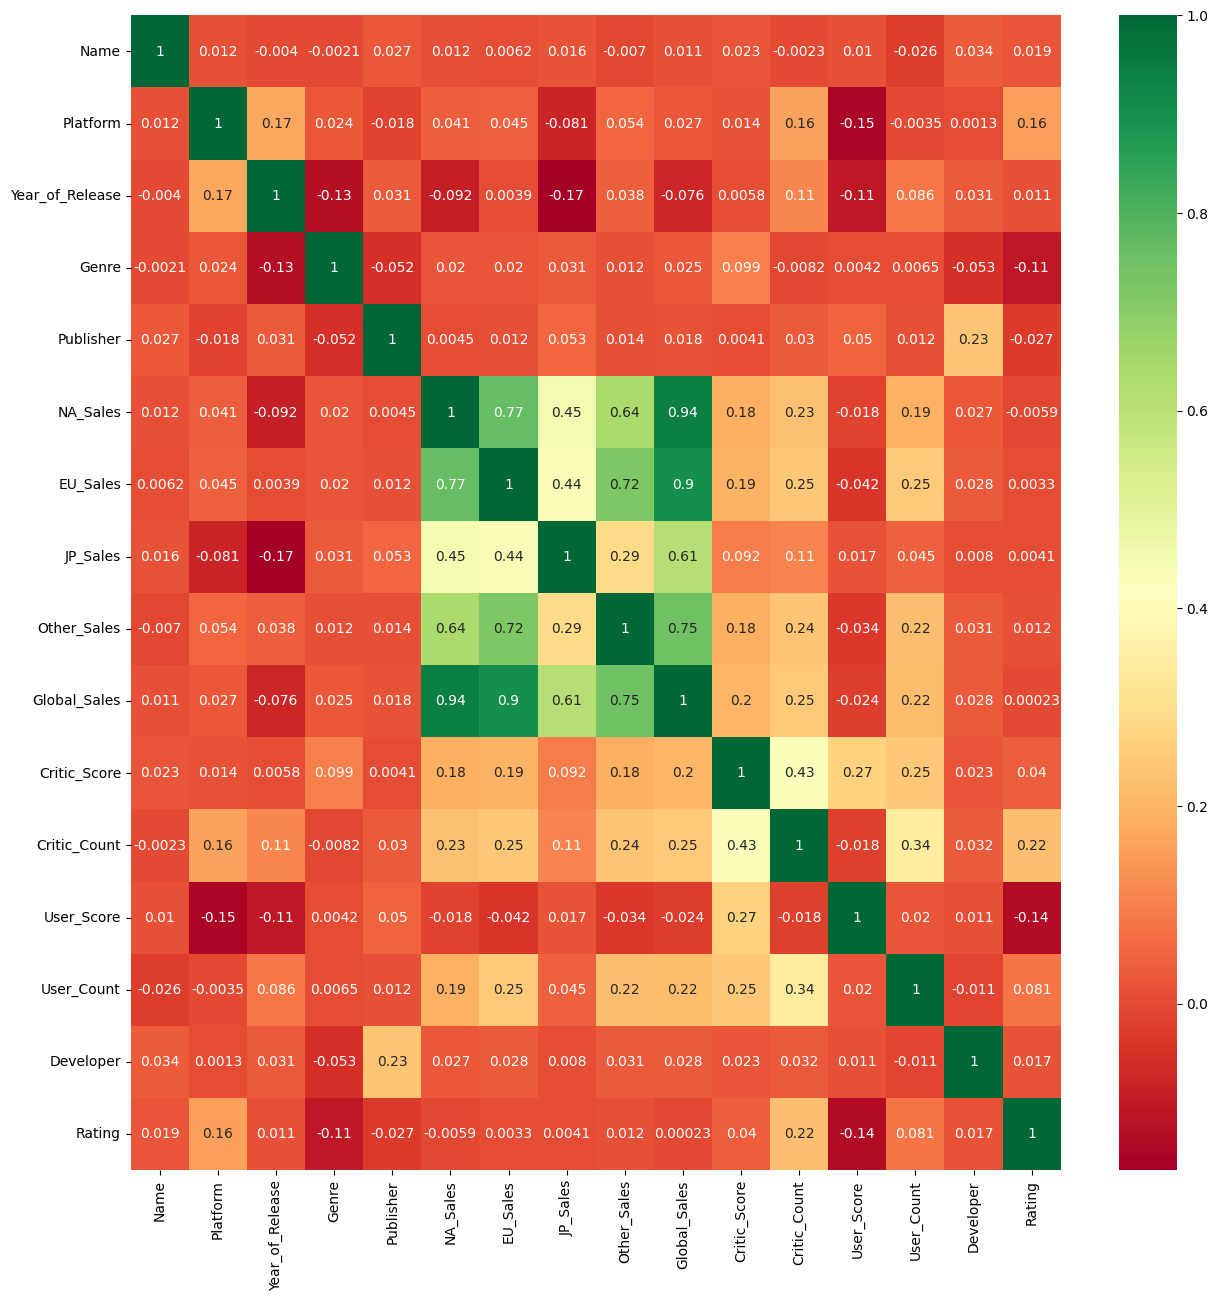

In [15]:
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(15,15))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

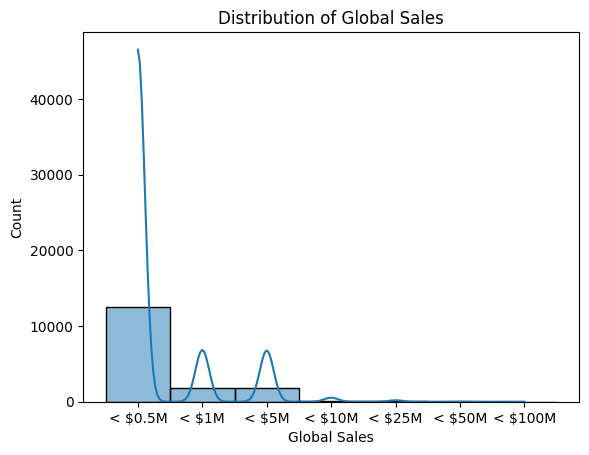

In [16]:
cuts = [float('-inf'), 0, 0.5, 1, 5, 10, 25, 50, 100]
y = y_cols['Global_Sales']

bin_labels = [f"< ${c}M" for c in cuts][1:]
y = pd.cut(y,bins = cuts, labels = bin_labels)

y_var = pd.Series(y, name = "Global Sales")
 
# Plot histogram
sns.histplot(data = y_var, kde = True)
plt.title('Distribution of Global Sales')

plt.show()

In [17]:
# create bins to encode sales columns
y_bins = {}

for y in y_cols:
    y_bins[y] = pd.Series(pd.cut(y_cols[y], bins = cuts, labels = bin_labels))
    
y_col_bins = pd.DataFrame(y_bins)

x_train, x_test, y_train, y_test = train_test_split(x_cols, y_col_bins, test_size=0.2)

x_train.head()


,Name,Platform,Year_of_Release,Genre,Publisher,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
11891,3997.0,26.0,2007.0,8.0,6.0,68.997119,26.440992,95.000000,163.008846,1362.000000,1.000000
11905,8214.0,12.0,1993.0,2.0,439.0,68.997119,26.440992,74.727254,163.008846,835.050081,3.558616
14927,8275.0,16.0,2008.0,1.0,246.0,68.997119,26.440992,74.727254,163.008846,835.050081,3.558616
5716,97.0,15.0,1999.0,3.0,21.0,68.997119,26.440992,74.727254,163.008846,835.050081,3.558616
7868,8673.0,16.0,2003.0,1.0,457.0,72.000000,48.000000,75.000000,41.000000,1228.000000,5.000000


In [18]:
x_train, x_test, y_train, y_test = train_test_split(x_cols, y_col_bins, test_size=0.2)

x_train.head()


,Name,Platform,Year_of_Release,Genre,Publisher,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
13084,5351.0,19.0,2006.0,6.0,21.0,67.000000,8.000000,95.000000,163.008846,829.000000,1.000000
11451,9999.0,13.0,2011.0,9.0,139.0,68.997119,26.440992,64.000000,9.000000,898.000000,7.000000
15070,9180.0,23.0,1994.0,2.0,479.0,68.997119,26.440992,74.727254,163.008846,835.050081,3.558616
1806,7967.0,28.0,2011.0,3.0,527.0,77.000000,30.000000,79.000000,62.000000,1524.000000,7.000000
15933,21.0,19.0,2013.0,1.0,266.0,68.997119,26.440992,74.727254,163.008846,835.050081,3.558616


In [19]:
y_train.head()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
13084,< $0.5M,< $0M,< $0M,< $0M,< $0.5M
11451,< $0.5M,< $0M,< $0M,< $0.5M,< $0.5M
15070,< $0M,< $0M,< $0.5M,< $0M,< $0.5M
1806,< $1M,< $0.5M,< $0.5M,< $0.5M,< $5M
15933,< $0M,< $0M,< $0.5M,< $0M,< $0.5M


In [20]:
# function to update max_leaf_nodes for DT classifier
clf = lambda x: tree.DecisionTreeClassifier(max_leaf_nodes=x)

def build_decision_tree(max_nodes, y_test_cat, y_train_cat, view_mode=False):
    # build classifier with specified max leaf nodes
    classifier = clf(max_nodes)
    # fit classifier to training data
    classifier.fit(x_train, np.ravel(y_train_cat))
    # export tree data with feature and class labels to graph visualizer
    dot_data = tree.export_graphviz(classifier, out_file=None, 
                                    feature_names = feats, class_names = bin_labels,
                                    impurity = False, filled=True, rounded=True)  
    
    # create the DT graph and render as a png
    graph = graphviz.Source(dot_data)
    graph.format = 'png'
    graph.render('decision_tree',view=view_mode)
    
    # calculate classifier score
    score = classifier.score(x_test, y_test_cat)
    y_pred = classifier.predict(x_test)
    print(f'Score: {score}\n')
    
    return score, y_pred


In [21]:

def grid_search(y_train):
    # initialze DT classifier
    max_nodes = None
    classifier = clf(max_nodes)
    
    # set max node range and suppress warning for small bins
    warnings.filterwarnings("ignore", category=UserWarning)
    params = {'max_leaf_nodes': list(range(3, 100))}
    
    # use grid search to get max leaf nodes hyperparameter
    grid_search = GridSearchCV(classifier,params)
    grid_search.fit(x_train, y_train)

    # update max node value
    max_nodes = grid_search.best_estimator_.max_leaf_nodes
    print(f'Max. leaf nodes from grid search: {max_nodes}')
    
    return max_nodes


In [24]:

y_preds = {}

for category in y_test:
    test, train = y_test[category], y_train[category]
    cat_title = ' '.join(category.split('_'))
    print(f'{cat_title} Classification:')
    
    max_nodes = grid_search(train)
    score, prediction = build_decision_tree(max_nodes, test, train)
    y_preds[category] = (score, prediction)
    
    

NA Sales Classification:
Max. leaf nodes from grid search: 98
Score: 0.7707064555420219

EU Sales Classification:
Max. leaf nodes from grid search: 99
Score: 0.7670523751522533

JP Sales Classification:
Max. leaf nodes from grid search: 94
Score: 0.8063337393422655

Other Sales Classification:
Max. leaf nodes from grid search: 99
Score: 0.7774056029232643

Global Sales Classification:
Max. leaf nodes from grid search: 50
Score: 0.797198538367844



In [23]:
y_cols.describe()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16416.000000,16416.000000,16416.000000,16416.000000,16416.000000
mean,0.264129,0.146034,0.078623,0.047670,0.536708
std,0.819028,0.507134,0.311348,0.188156,1.559885
min,0.000000,0.000000,0.000000,0.000000,0.010000
25%,0.000000,0.000000,0.000000,0.000000,0.060000
50%,0.080000,0.020000,0.000000,0.010000,0.170000
75%,0.240000,0.110000,0.040000,0.030000,0.470000
max,41.360000,28.960000,10.220000,10.570000,82.530000


# Bins from Bayesian model

In [25]:
cuts = {
    'NA_Sales':     [float('-inf'), 0, 0.001, 0.5, 0.6, 0.8, 2, 5, 10, 100],
    'EU_Sales':     [float('-inf'), 0, 0.001, 0.5, 0.6, 0.8, 2, 5, 10, 100],
    'JP_Sales':     [float('-inf'), 0, 0.001, 0.01, 0.06, 0.1, 0.5, 10, 100],
    'Other_Sales':  [float('-inf'), 0, 0.001, 0.5, 0.6, 0.8, 2, 5, 10, 100],
    'Global_Sales': [float('-inf'), 0, 0.001, 0.5, 0.6, 0.8, 1, 10, 100]
}

y_bins = {}

# Plot the distributions for each region
# fig, axs = plt.subplots(5, 1, figsize=(12,24))
for i in range(5):
    y = y_cols.columns[i]
    bin_labels = [f"< ${c}M" for c in cuts[y]][1:]
    y_var = pd.Series(pd.cut(y_cols[y], bins = cuts[y], labels = bin_labels))
    y_bins[y] = y_var
    
    # sns.histplot(data = y_var, kde = True, ax = axs[i])
    # axs[i].set_title(f'Distribution of {y}')
    # plt.setp(axs[i].get_xticklabels(), rotation=60)
    # plt.tight_layout()

y_col_bins = pd.DataFrame(y_bins) 

In [26]:
x_train, x_test, y_train, y_test = train_test_split(x_cols, y_col_bins, test_size=0.2)

In [27]:
y_preds = {}

for category in y_test:
    test, train = y_test[category], y_train[category]
    cat_title = ' '.join(category.split('_'))
    print(f'{cat_title} Classification:')
    
    max_nodes = grid_search(train)
    score, prediction = build_decision_tree(max_nodes, test, train)
    y_preds[category] = (score, prediction)

NA Sales Classification:
Max. leaf nodes from grid search: 93
Score: 0.7713154689403167

EU Sales Classification:
Max. leaf nodes from grid search: 99
Score: 0.76278928136419

JP Sales Classification:
Max. leaf nodes from grid search: 89
Score: 0.6982338611449452

Other Sales Classification:
Max. leaf nodes from grid search: 45
Score: 0.7798416565164433

Global Sales Classification:
Max. leaf nodes from grid search: 46
Score: 0.8017661388550548

